In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
data = pd.read_csv('data/Train.csv')

In [3]:
data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


311


To convert the string to an actual dict, you can do df['Pollutant Levels'].map(eval). Afterwards, the solution below can be used to convert the dict to different columns.

Using a small example, you can use .apply(pd.Series):

In [2]: df = pd.DataFrame({'a':[1,2,3], 'b':[{'c':1}, {'d':3}, {'c':5, 'd':6}]})

In [3]: df
Out[3]:
   a                   b
0  1           {u'c': 1}
1  2           {u'd': 3}
2  3  {u'c': 5, u'd': 6}

In [4]: df['b'].apply(pd.Series)
Out[4]:
     c    d
0  1.0  NaN
1  NaN  3.0
2  5.0  6.0
To combine it with the rest of the dataframe, you can concat the other columns with the above result:

In [7]: pd.concat([df.drop(['b'], axis=1), df['b'].apply(pd.Series)], axis=1)
Out[7]:
   a    c    d
0  1  1.0  NaN
1  2  NaN  3.0
2  3  5.0  6.0

In [4]:
data

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750
...,...,...,...,...,...,...,...,...,...
15534,ID_train_9995,A,"22.71666667,16.93333333,18.03333333,18.975,19....","31.467,31.842,0.34,0.0,0.0,0.119,0.0,0.017,0.0...","0.794090909,0.97425,0.997583333,0.9985,0.999,0...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.27666667,88.24333333,88.18166667,88.1758333...",44.850286
15535,ID_train_9996,E,"25.375,26.025,26.4,26.23333333,25.7,24.9,23.20...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.685333333,0.6549166670000001,0.6435833329999...","176.5438256,196.5264893,177.1717795,151.268141...","1.328333333,1.278333333,1.535833333,2.315,1.92...","88.43666667,88.34583333,88.26083333,88.1741666...",24.330455
15536,ID_train_9997,D,"26.09166667,28.975,30.31666667,30.96666667,30....","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.78175,0.5780833329999999,0.513333333,0.50233...","121.7060158,147.2472237,87.95942197,121.598728...","0.936666667,1.044166667,1.239166667,1.51083333...","90.61583333,90.44916667,90.32916667,90.27,90.2...",38.972128
15537,ID_train_9998,D,"29.225,30.0,29.55,29.66666667,27.725,24.466666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.6283333329999999,0.605833333,0.594166667,0.5...","156.4757306,168.1802199,33.83625816,352.712136...","1.330833333,1.466666667,0.9075,1.060833333,0.8...","90.31416667,90.23916667,90.20166667,90.2225,90...",41.720952


In [5]:
for c in data.columns[2:-1]:
    data[c] = data[c].apply(lambda x: [a for a in str(x).split(",")])

In [6]:
data

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",45.126304
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750
...,...,...,...,...,...,...,...,...,...
15534,ID_train_9995,A,"[22.71666667, 16.93333333, 18.03333333, 18.975...","[31.467, 31.842, 0.34, 0.0, 0.0, 0.119, 0.0, 0...","[0.794090909, 0.97425, 0.997583333, 0.9985, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.27666667, 88.24333333, 88.18166667, 88.175...",44.850286
15535,ID_train_9996,E,"[25.375, 26.025, 26.4, 26.23333333, 25.7, 24.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.685333333, 0.6549166670000001, 0.6435833329...","[176.5438256, 196.5264893, 177.1717795, 151.26...","[1.328333333, 1.278333333, 1.535833333, 2.315,...","[88.43666667, 88.34583333, 88.26083333, 88.174...",24.330455
15536,ID_train_9997,D,"[26.09166667, 28.975, 30.31666667, 30.96666667...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.78175, 0.5780833329999999, 0.513333333, 0.5...","[121.7060158, 147.2472237, 87.95942197, 121.59...","[0.936666667, 1.044166667, 1.239166667, 1.5108...","[90.61583333, 90.44916667, 90.32916667, 90.27,...",38.972128
15537,ID_train_9998,D,"[29.225, 30.0, 29.55, 29.66666667, 27.725, 24....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6283333329999999, 0.605833333, 0.594166667,...","[156.4757306, 168.1802199, 33.83625816, 352.71...","[1.330833333, 1.466666667, 0.9075, 1.060833333...","[90.31416667, 90.23916667, 90.20166667, 90.222...",41.720952


In [7]:
hours = list(range(121))

data.insert(len(data.columns)-1, 'hours', [hours] * data.shape[0])

In [8]:
day = [1, 2, 3, 4, 5]
rep = [25, 24, 24, 24, 24]

days = np.repeat(day, rep)

In [9]:
data.insert(len(data.columns)-1, 'day', [days] * data.shape[0])

In [10]:
data

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,hours,day,target
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",45.126304
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",79.131702
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.55166667, 88.46416667, 88.31916667, 88.24,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32.661304
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",53.850238
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",177.418750
...,...,...,...,...,...,...,...,...,...,...,...
15534,ID_train_9995,A,"[22.71666667, 16.93333333, 18.03333333, 18.975...","[31.467, 31.842, 0.34, 0.0, 0.0, 0.119, 0.0, 0...","[0.794090909, 0.97425, 0.997583333, 0.9985, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.27666667, 88.24333333, 88.18166667, 88.175...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",44.850286
15535,ID_train_9996,E,"[25.375, 26.025, 26.4, 26.23333333, 25.7, 24.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.685333333, 0.6549166670000001, 0.6435833329...","[176.5438256, 196.5264893, 177.1717795, 151.26...","[1.328333333, 1.278333333, 1.535833333, 2.315,...","[88.43666667, 88.34583333, 88.26083333, 88.174...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",24.330455
15536,ID_train_9997,D,"[26.09166667, 28.975, 30.31666667, 30.96666667...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.78175, 0.5780833329999999, 0.513333333, 0.5...","[121.7060158, 147.2472237, 87.95942197, 121.59...","[0.936666667, 1.044166667, 1.239166667, 1.5108...","[90.61583333, 90.44916667, 90.32916667, 90.27,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",38.972128
15537,ID_train_9998,D,"[29.225, 30.0, 29.55, 29.66666667, 27.725, 24....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6283333329999999, 0.605833333, 0.594166667,...","[156.4757306, 168.1802199, 33.83625816, 352.71...","[1.330833333, 1.466666667, 0.9075, 1.060833333...","[90.31416667, 90.23916667, 9

In [11]:
data = data.explode(data.columns[2:-1].to_list())

In [12]:
data.to_csv('data/train_melt.csv')

In [13]:
data = data.replace('nan', np.nan)

In [14]:
# missing data
data.shape[0] - (data.isna().sum()/data.shape[0]).max() * data.shape[0]

1685332.0

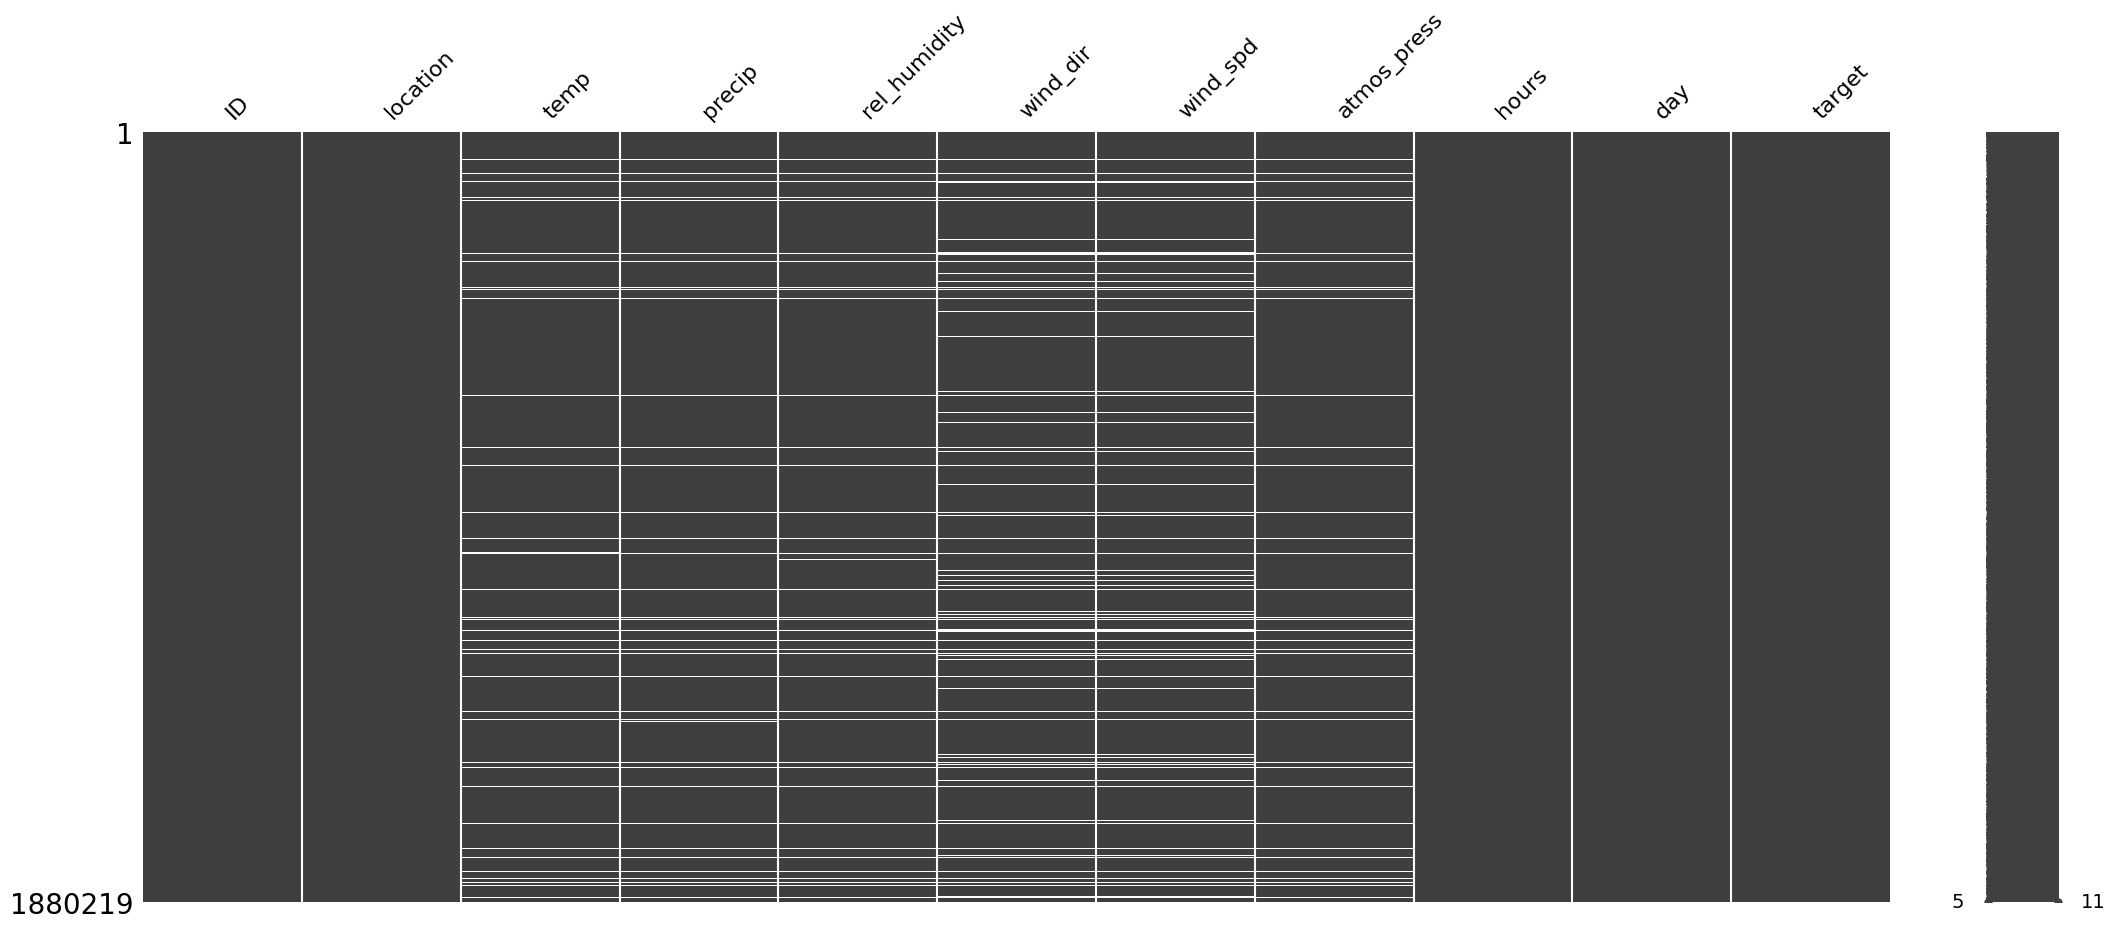

In [15]:
msno.matrix(data);

In [16]:
for c in data.columns[2:]:
    data[c] = data[c].apply(lambda x: float(x))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880219 entries, 0 to 15538
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            object 
 1   location      object 
 2   temp          float64
 3   precip        float64
 4   rel_humidity  float64
 5   wind_dir      float64
 6   wind_spd      float64
 7   atmos_press   float64
 8   hours         float64
 9   day           float64
 10  target        float64
dtypes: float64(9), object(2)
memory usage: 172.1+ MB


In [18]:
data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,hours,day,target
0,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,45.126304
0,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,45.126304
0,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,45.126304
0,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,45.126304
0,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,45.126304


In [35]:
def aggregate(data, group: list, cid: list, func: str) -> pd.DataFrame:
    if func == 'mean':
        return data.groupby(group)[data.columns[cid[0]:cid[1]]].mean()
    elif func == 'median':
        return data.groupby(group)[data.columns[cid[0]:cid[1]]].median()
    elif func == 'min':
        return data.groupby(group)[data.columns[cid[0]:cid[1]]].min()
    elif func == 'max':
        return data.groupby(group)[data.columns[cid[0]:cid[1]]].max()

In [37]:
for i in ['mean', 'median', 'min', 'max']:
    aggregate(data, ['ID', 'day'], [2,-3], i).to_csv(f'data/train_daily_{i}.csv')